In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

In [69]:
df = pd.read_csv('Data PMP Take-Home 2019/pmp_takehome_2019.csv')

In [70]:
df.head(5)

,Location number,Month,State,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned
0,1,1,TX,48628171.02,9218156.69,24278189.23,365880,4452,False
1,1,2,TX,48107179.24,10587747.35,25116844.41,365880,4452,False
2,1,3,TX,64352278.29,10193873.77,33703499.83,365880,4452,False
3,1,4,TX,45943677.96,8764165.00,24037719.47,365880,4452,False
4,1,5,TX,32761434.98,8022116.43,16432119.18,365880,4452,False


In [71]:
#rent is not included in fixed or variable costs
df['Profit'] = df['Gross revenue'] - df['Fixed cost'] - df['Variable cost'] - df['Rental cost']

In [102]:
yearly_df = df.groupby(['Location number', 'State']).sum()
yearly_df.head(5)

,,Month,Gross revenue,Fixed cost,Variable cost,Rental cost,Number of products,Owned,Profit
Location number,State,,,,,,,,
1,TX,78,5.447389e+08,1.108956e+08,2.793687e+08,4390560,53424,0.0,1.500840e+08
2,TX,78,3.559730e+08,7.287395e+07,1.937291e+08,783240,54024,0.0,8.858672e+07
3,IL,78,3.317718e+08,6.429775e+07,1.848279e+08,0,55440,12.0,8.264618e+07
4,GA,78,2.639843e+08,6.410409e+07,1.432398e+08,1696920,53772,0.0,5.494349e+07
5,NJ,78,1.890016e+08,4.475050e+07,1.037553e+08,894000,54396,0.0,3.960178e+07


In [73]:
yearly_df['Annual Profit Margin'] = yearly_df['Profit'] / yearly_df['Gross revenue']

In [74]:
monthly_df = df[['Month', 'Profit', 'Gross revenue', 'Fixed cost', 'Variable cost']].groupby('Month').sum()
monthly_df.reset_index(inplace=True)
monthly_df['Profit(B)'] = monthly_df['Profit']/1000000000
monthly_df['Gross revenue(B)'] = monthly_df['Gross revenue']/1000000000
monthly_df['Fixed cost(B)'] = monthly_df['Fixed cost']/1000000000
monthly_df['Variable cost(B)'] = monthly_df['Variable cost']/1000000000

In [75]:
monthly_df.head(5)

,Month,Profit,Gross revenue,Fixed cost,Variable cost,Profit(B),Gross revenue(B),Fixed cost(B),Variable cost(B)
0,1,2.242435e+09,9.304129e+09,2.069499e+09,4.943004e+09,2.242435,9.304129,2.069499,4.943004
1,2,2.593018e+09,9.786843e+09,1.964354e+09,5.180280e+09,2.593018,9.786843,1.964354,5.180280
2,3,3.115249e+09,1.158736e+10,2.296857e+09,6.126065e+09,3.115249,11.587361,2.296857,6.126065
3,4,2.385892e+09,9.105208e+09,1.915483e+09,4.754642e+09,2.385892,9.105208,1.915483,4.754642
4,5,2.560839e+09,9.347461e+09,1.877253e+09,4.860179e+09,2.560839,9.347461,1.877253,4.860179


In [76]:
monthly_df['Quarter'] = sum([[i]* 3 for i in range(1, 5)], [])

In [77]:
quarterly_df = monthly_df[['Quarter', 'Profit(B)', 'Gross revenue(B)', 'Fixed cost(B)', 'Variable cost(B)']].groupby('Quarter').sum()
quarterly_df.reset_index(inplace=True)

In [78]:
quarterly_df

,Quarter,Profit(B),Gross revenue(B),Fixed cost(B),Variable cost(B)
0,1,7.950702,30.678333,6.330709,16.249348
1,2,7.971688,29.750313,6.168927,15.462124
2,3,8.132233,29.881072,6.241126,15.360140
3,4,7.731375,29.937167,6.227698,15.830521


## Part 1 – Summary statistics and plots

### 1) Looking across all locations, calculate the mean and median annual profit margin of a typical store. Does the profit margin across locations appear normally distributed? Please visualize.

In [79]:
# Mean and Median
# Mean is 24.86%
# Median is 26.18%
yearly_df.describe()

,Profit,Gross revenue,Annual Profit Margin
count,3.330000e+02,3.330000e+02,333.000000
mean,9.545345e+07,3.611018e+08,0.248632
std,6.372627e+07,1.884411e+08,0.062474
min,-8.699418e+05,7.820048e+07,-0.010842
25%,5.250278e+07,2.388057e+08,0.212983
50%,8.161126e+07,3.193804e+08,0.261849
75%,1.211619e+08,4.313263e+08,0.293740
max,3.786283e+08,1.200481e+09,0.402023


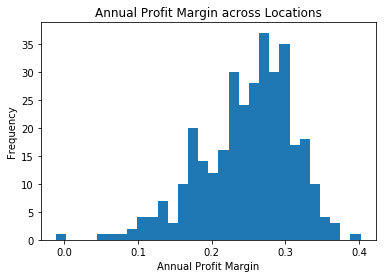

In [81]:
plt.hist(yearly_df['Annual Profit Margin'], bins=30)
plt.xlabel('Annual Profit Margin')
plt.ylabel('Frequency')
plt.title('Annual Profit Margin across Locations')

#### The profit margin seems to be a left-skewed distribution with mean less than median.

### 2) Please plot the monthly and quarterly aggregate revenue across all stores.

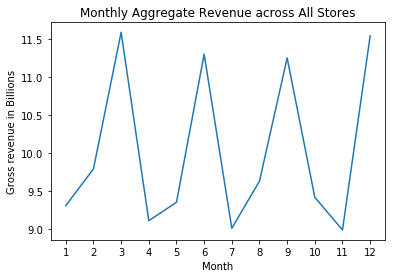

In [82]:
plt.plot(monthly_df['Month'],monthly_df['Gross revenue(B)'])
plt.xticks(range(1, 13))
plt.xlabel('Month')
plt.ylabel('Gross revenue in Billions')
plt.title('Monthly Aggregate Revenue across All Stores')
plt.show()

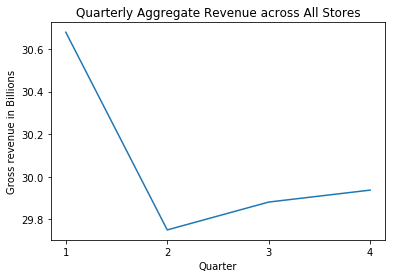

In [83]:
plt.plot(quarterly_df['Quarter'],quarterly_df['Gross revenue(B)'])
plt.xticks(range(1, 5))
plt.xlabel('Quarter')
plt.ylabel('Gross revenue in Billions')
plt.title('Quarterly Aggregate Revenue across All Stores')
plt.show()

## Part 2 – Cleaning the data

In [ ]:
# Three ideas: 
#    1. Use mean/median across all locations
#    2. Use statewise mean/median across all locations within each state
#    3. Impute with Regression based on other variables (number of products, fixed cost, etc)

# One consideration: the missing number is not at random

In [84]:
owned_df = df[df['Owned']]
leased_df = df[~df['Owned']]

In [85]:
owned_df = owned_df.drop(['Rental cost'], axis=1)

In [86]:
print("Number of owned stores {}".format(len(owned_df)/12))
print("Number of leased stores {}".format(len(leased_df)/12))

Number of owned stores 36.0
Number of leased stores 297.0


In [87]:
owned_df.State.unique()
leased_df.State.unique()

array(['TX', 'GA', 'NJ', 'IL', 'CA', 'CO', 'WA'], dtype=object)

In [88]:
# Check to see if the rent is the same across months for each location -> YES
(df.groupby('Location number')['Rental cost'].nunique() > 1).unique()

array([False])

In [93]:
leased_df_cleaned = leased_df.loc[leased_df['Month'] == 1, ['Location number', 'State', 'Number of products', 'Rental cost', 'Gross revenue']]

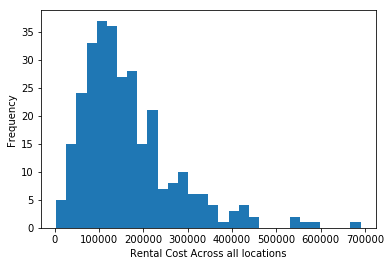

In [106]:
plt.hist(leased_df_cleaned['Rental cost'], bins=30)
plt.xlabel('Rental Cost Across all locations')
plt.ylabel('Frequency')

/Users/chenmeng/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


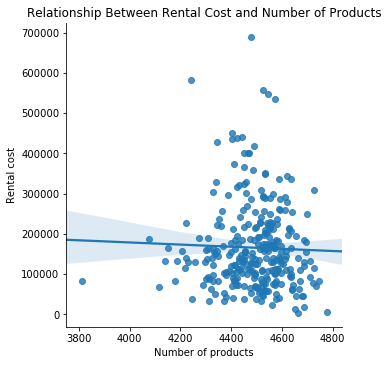

In [91]:
# Check if the larger the number of products -> the larger the store -> the higher the rental cost -> NO
sns.lmplot(x='Number of products',y='Rental cost',data=leased_df_cleaned,fit_reg=True)
ax = plt.gca()
ax.set_title('Relationship Between Rental Cost and Number of Products')

In [110]:
X = leased_df_cleaned[['Number of products']] 
y = leased_df_cleaned['Rental cost']
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rental cost   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3050
Date:                Sun, 11 Aug 2019   Prob (F-statistic):              0.581
Time:                        08:45:50   Log-Likelihood:                -3857.9
No. Observations:                 297   AIC:                             7720.
Df Residuals:                     295   BIC:                             7727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.848e+05   2.16e+05      1.319      0.188    -1.4e+05     7.1e+05
Number of products   -26.5395     48.058     -0.552      0.581    -121.119      68.040
==============================================================================
Omnibus:                       99.153   Durbin-Watson:                   2.170
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.052
Skew:                           1.564   Prob(JB):                     2.06e-57
Kurtosis:                       6.363   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/Users/chenmeng/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


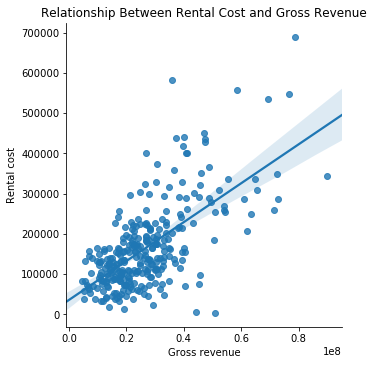

In [94]:
# Check if the larger the gross revenue -> the larger the store -> the higher the rental cost -> YES
sns.lmplot(x='Gross revenue',y='Rental cost',data=leased_df_cleaned,fit_reg=True)
ax = plt.gca()
ax.set_title('Relationship Between Rental Cost and Gross Revenue')

In [115]:
yearly_df.reset_index(inplace= True)
yearly_df_leased = yearly_df.loc[(yearly_df['Owned'] == 0),]
X = yearly_df_leased[['Fixed cost', 'Gross revenue', 'Variable cost', 'Number of products']] 
y = yearly_df_leased['Rental cost']
## fit a OLS model with intercept
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Rental cost   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     102.8
Date:                Sun, 11 Aug 2019   Prob (F-statistic):           1.66e-54
Time:                        08:49:37   Log-Likelihood:                -4465.6
No. Observations:                 297   AIC:                             8941.
Df Residuals:                     292   BIC:                             8960.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.887e+07   2.28e+06      8.276      0.000    1.44e+07    2.34e+07
Fixed cost             0.0124      0.006      1.905      0.058      -0.000       0.025
Gross revenue          0.0114      0.002      4.749      0.000       0.007       0.016
Variable cost         -0.0146      0.004     -3.266      0.001      -0.023      -0.006
Number of products  -354.4809     42.295     -8.381      0.000    -437.722    -271.240
==============================================================================
Omnibus:                       12.049   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.547
Skew:                          -0.013   Prob(JB):                     1.72e-06
Kurtosis:                       4.464   Cond. No.                     2.14e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Number of products, gross revenue and variable cost all have statistically significant coefficients. However, this makes me suspicious, because from the analysis above, number of products alone is not explanatory for rental cost. Thus, it is probably due to the correlations between the independent variables. Two related questions I want to ask myself before imputing are: 1. do the relationships identified above make economic intuitive sense (for example, does it make sense for locations with higher variable cost to have consistently lower rental cost? => not really) / are correlations identified here causation? 2. would using linear regression based on these variables introduce any systematic bias, especially since all these variables are correlated among each other? => probably

### Conclusion: I decide to use the mean store rental cost of each state for imputation

In [116]:
leased_df_mean = leased_df_cleaned.groupby('State').mean().reset_index()
leased_df_mean
# What surprised me is that TX has the highest rent, while CA is only around the median

,State,Location number,Number of products,Rental cost,Gross revenue
0,CA,170.966667,4490.216667,162564.000000,2.587820e+07
1,CO,172.461538,4501.307692,159454.615385,2.949175e+07
2,GA,161.040000,4496.460000,152734.000000,2.454661e+07
3,IL,162.571429,4493.119048,159050.000000,2.565981e+07
4,NJ,154.310345,4478.137931,165716.206897,2.494214e+07
5,TX,183.577778,4496.111111,178770.888889,3.040141e+07
6,WA,142.538462,4457.538462,165574.615385,2.146791e+07


In [117]:
owned_df = pd.merge(owned_df, leased_df_mean[['State', 'Rental cost']], on = 'State', how = 'left')

In [118]:
cleaned_df = leased_df.append(owned_df)

/Users/chenmeng/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [ ]:
cleaned_df.to_csv('cleaned_data.csv', index = False)

In [119]:
# Check if there is still 0 rental cost -> Nope! all stores are imputed
cleaned_df.loc[cleaned_df['Rental cost'] == 0,]

,Fixed cost,Gross revenue,Location number,Month,Number of products,Owned,Profit,Rental cost,State,Variable cost


## Part 3 – Quantify drivers of success

In [120]:
cleaned_df = pd.read_csv('cleaned_data.csv')

In [121]:
cleaned_df.head()

,Fixed cost,Gross revenue,Location number,Month,Number of products,Owned,Profit,Rental cost,State,Variable cost
0,9218156.69,48628171.02,1,1,4452,False,14765945.10,365880.0,TX,24278189.23
1,10587747.35,48107179.24,1,2,4452,False,12036707.48,365880.0,TX,25116844.41
2,10193873.77,64352278.29,1,3,4452,False,20089024.69,365880.0,TX,33703499.83
3,8764165.00,45943677.96,1,4,4452,False,12775913.49,365880.0,TX,24037719.47
4,8022116.43,32761434.98,1,5,4452,False,7941319.37,365880.0,TX,16432119.18


In [122]:
cleaned_df[['Rental cost', 'Gross revenue', 'Fixed cost', 'Variable cost']] = cleaned_df[['Rental cost', 'Gross revenue', 'Fixed cost', 'Variable cost']]/1000000

In [123]:
cleaned_df['Profit'] = cleaned_df['Gross revenue'] - cleaned_df['Fixed cost'] - cleaned_df['Variable cost'] - cleaned_df['Rental cost']
yearly_cleaned_df = cleaned_df.groupby(['Location number', 'Number of products', 'State']).sum()
yearly_cleaned_df['Annual Profit Margin'] = yearly_cleaned_df['Profit'] / yearly_cleaned_df['Gross revenue'] * 100

In [124]:
yearly_cleaned_df.head()

,,,Fixed cost,Gross revenue,Month,Owned,Profit,Rental cost,Variable cost,Annual Profit Margin
Location number,Number of products,State,,,,,,,,
1,4452,TX,110.895577,544.738869,78,0.0,150.084018,4.39056,279.368714,27.551553
2,4502,TX,72.873949,355.973013,78,0.0,88.586724,0.78324,193.729100,24.885798
3,4620,IL,64.297749,331.771805,78,12.0,80.737580,1.90860,184.827877,24.335275
4,4481,GA,64.104093,263.984311,78,0.0,54.943489,1.69692,143.239810,20.813164
5,4533,NJ,44.750496,189.001593,78,0.0,39.601779,0.89400,103.755319,20.953145


In [125]:
yearly_cleaned_df.reset_index(inplace = True)
yearly_cleaned_df.drop(['Month','Owned'],axis=1, inplace = True)

### Summary Table

In [135]:
summary_1 = yearly_cleaned_df.groupby(['State']).mean()[['Fixed cost', 'Variable cost', 'Rental cost', 'Gross revenue', 'Annual Profit Margin', 'Number of products']]

In [136]:
summary_1.reset_index(inplace = True)

In [137]:
summary_1

,State,Fixed cost,Variable cost,Rental cost,Gross revenue,Annual Profit Margin,Number of products
0,CA,70.105468,177.964697,1.950768,343.843645,25.902094,4500.111111
1,CO,82.369781,202.951935,1.913455,390.426997,25.436247,4526.266667
2,GA,71.390163,173.775295,1.832808,316.527262,20.548534,4508.314815
3,IL,72.403999,182.640878,1.908600,349.285104,25.019871,4534.092593
4,NJ,79.430948,198.353539,1.988594,355.888005,19.467053,4499.968750
5,TX,79.706377,205.193137,2.145251,404.376219,27.846303,4513.445545
6,WA,68.517828,166.270373,1.986895,324.574983,25.139226,4472.000000


In [128]:
summary_1['Fixed cost']  = summary_1['Fixed cost'] / summary_1['Gross revenue']
summary_1['Variable cost']  = summary_1['Variable cost'] / summary_1['Gross revenue']
summary_1['Rental cost']  = summary_1['Rental cost'] / summary_1['Gross revenue']

In [129]:
summary_1.rename({'Fixed cost': 'Fixed cost Percentage', 'Variable cost': 'Variable cost Percentage', 'Rental cost': 'Rental cost Percentage'}, axis=1, inplace=True)

In [130]:
summary_1

,State,Fixed cost Percentage,Variable cost Percentage,Rental cost Percentage,Gross revenue,Annual Profit Margin,Number of products
0,CA,0.203888,0.517574,0.005673,343.843645,25.902094,4500.111111
1,CO,0.210974,0.519820,0.004901,390.426997,25.436247,4526.266667
2,GA,0.225542,0.549006,0.005790,316.527262,20.548534,4508.314815
3,IL,0.207292,0.522899,0.005464,349.285104,25.019871,4534.092593
4,NJ,0.223191,0.557348,0.005588,355.888005,19.467053,4499.968750
5,TX,0.197109,0.507431,0.005305,404.376219,27.846303,4513.445545
6,WA,0.211100,0.512271,0.006122,324.574983,25.139226,4472.000000


In [131]:
summary_1['Fixed cost Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in summary_1['Fixed cost Percentage']], index = summary_1.index)
summary_1['Rental cost Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in summary_1['Rental cost Percentage']], index = summary_1.index)
summary_1['Variable cost Percentage'] = pd.Series(["{0:.2f}%".format(val * 100) for val in summary_1['Variable cost Percentage']], index = summary_1.index)
summary_1['Annual Profit Margin'] = pd.Series(["{0:.2f}%".format(val) for val in summary_1['Annual Profit Margin']], index = summary_1.index)

In [132]:
summary_1 = summary_1[['State', 'Fixed cost Percentage', 'Variable cost Percentage', 'Rental cost Percentage', 'Annual Profit Margin', 'Gross revenue', 'Number of products']]

In [133]:
summary_1.sort_values('Annual Profit Margin')

,State,Fixed cost Percentage,Variable cost Percentage,Rental cost Percentage,Annual Profit Margin,Gross revenue,Number of products
4,NJ,22.32%,55.73%,0.56%,19.47%,355.888005,4499.968750
2,GA,22.55%,54.90%,0.58%,20.55%,316.527262,4508.314815
3,IL,20.73%,52.29%,0.55%,25.02%,349.285104,4534.092593
6,WA,21.11%,51.23%,0.61%,25.14%,324.574983,4472.000000
1,CO,21.10%,51.98%,0.49%,25.44%,390.426997,4526.266667
0,CA,20.39%,51.76%,0.57%,25.90%,343.843645,4500.111111
5,TX,19.71%,50.74%,0.53%,27.85%,404.376219,4513.445545


In [138]:
monthly_cleaned_df = cleaned_df.loc[:,['State', 'Month', 'Profit', 'Gross revenue', 'Fixed cost', 'Variable cost', 'Rental cost']].groupby(['Month', 'State']).mean().reset_index()

In [139]:
monthly_cleaned_df.head()

,Month,State,Profit,Gross revenue,Fixed cost,Variable cost,Rental cost
0,1,CA,6.732820,26.850985,5.846049,14.109551,0.162564
1,1,CO,7.332965,31.022081,6.992144,16.537518,0.159455
2,1,GA,4.912733,24.673560,5.827108,13.780985,0.152734
3,1,IL,6.616486,27.133391,6.021225,14.336630,0.159050
4,1,NJ,5.353857,27.739281,6.546240,15.673467,0.165716


In [140]:
monthly_cleaned_df['Quarter'] = sum([[i]* 21 for i in range(1, 5)], [])
monthly_cleaned_df.head()

,Month,State,Profit,Gross revenue,Fixed cost,Variable cost,Rental cost,Quarter
0,1,CA,6.732820,26.850985,5.846049,14.109551,0.162564,1
1,1,CO,7.332965,31.022081,6.992144,16.537518,0.159455,1
2,1,GA,4.912733,24.673560,5.827108,13.780985,0.152734,1
3,1,IL,6.616486,27.133391,6.021225,14.336630,0.159050,1
4,1,NJ,5.353857,27.739281,6.546240,15.673467,0.165716,1


In [145]:
quarterly_cleaned_df = monthly_cleaned_df[['State', 'Quarter', 'Profit', 'Gross revenue', 'Fixed cost', 'Variable cost', 'Rental cost']].groupby(['Quarter', 'State']).sum()
quarterly_cleaned_df.reset_index(inplace = True)

In [146]:
quarterly_cleaned_df['Profit margin'] = quarterly_cleaned_df['Profit'] / quarterly_cleaned_df['Gross revenue']
quarterly_cleaned_df['Cost'] = quarterly_cleaned_df['Fixed cost'] + quarterly_cleaned_df['Variable cost'] + quarterly_cleaned_df['Rental cost']

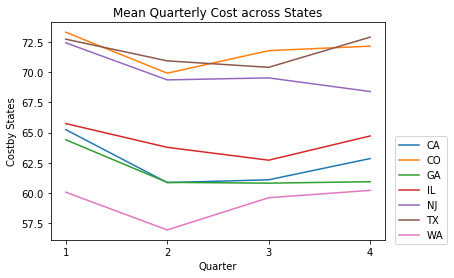

In [148]:
#Code to draw variable trends
variable = 'Cost'
quarterly_cleaned_df_pivot = quarterly_cleaned_df.pivot(index='Quarter', columns='State', values= variable)

plt = quarterly_cleaned_df_pivot.plot()
plt.set_ylabel(variable + 'by States')
plt.set_title("Mean Quarterly " + variable + " across States")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.set_xticks(range(1, 5))

In [67]:
quarterly_cleaned_df

State,CA,CO,GA,IL,NJ,TX,WA
Quarter,,,,,,,
1,65.243845,73.328701,64.403127,65.747308,72.449685,72.751951,60.053143
2,60.848123,69.930598,60.868310,63.777444,69.374290,70.953849,56.922399
3,61.083213,71.801614,60.803531,62.710066,69.540743,70.416430,59.595791
4,62.845752,72.174258,60.923299,64.718659,68.408363,72.922535,60.203764


## Observation 1: NJ and GA have the lowest average annual profit margins, with NJ due to relatively high cost (both fixed and variable) and GA due to relatively low gross revenue.

### Location Level Analysis

/Users/chenmeng/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


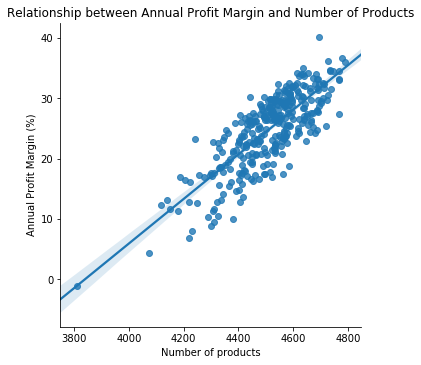

In [19]:
sns.lmplot(x='Number of products',y='Annual Profit Margin',data=yearly_cleaned_df,fit_reg=True)
ax = plt.gca()
ax.set_title("Relationship between Annual Profit Margin and Number of Products")
ax.set_ylabel("Annual Profit Margin (%)")

/Users/chenmeng/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


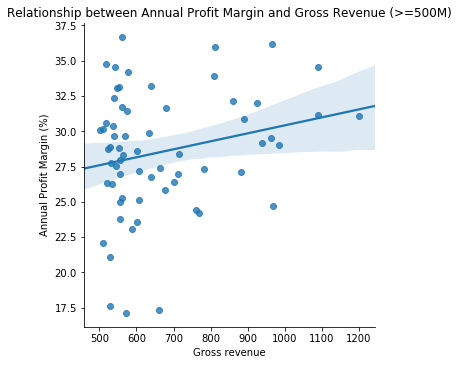

In [31]:
yearly_cleaned_df_a = yearly_cleaned_df.loc[yearly_cleaned_df['Gross revenue']<500,]
yearly_cleaned_df_b = yearly_cleaned_df.loc[yearly_cleaned_df['Gross revenue']>=500,]

sns.lmplot(x='Gross revenue',y='Annual Profit Margin',data=yearly_cleaned_df_b,fit_reg=True)
ax = plt.gca()
ax.set_title("Relationship between Annual Profit Margin and Gross Revenue (>=500M)")
ax.set_ylabel("Annual Profit Margin (%)")

In [154]:
X = yearly_cleaned_df[['Gross revenue', 'Number of products']] 
y = yearly_cleaned_df['Annual Profit Margin']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Annual Profit Margin   R-squared:                       0.658
Model:                              OLS   Adj. R-squared:                  0.656
Method:                   Least Squares   F-statistic:                     317.4
Date:                  Sun, 11 Aug 2019   Prob (F-statistic):           1.34e-77
Time:                          09:15:31   Log-Likelihood:                -902.08
No. Observations:                   333   AIC:                             1810.
Df Residuals:                       330   BIC:                             1822.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -130.2898      7.396    -17.616      0.000    -144.840    -115.740
Gross revenue          0.0043      0.001      3.569      0.000       0.002       0.007
Number of products     0.0340      0.002     20.225      0.000       0.031       0.037
==============================================================================
Omnibus:                       14.684   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.431
Skew:                          -0.395   Prob(JB):                      0.00200
Kurtosis:                       2.477   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observation 2: Number of products and location size (represented by gross revenue) are highly positively correlated with profit margin at each location. To maximize profit margin, two approaches are: increasing the breadth of products offered, and expanding location size to achieve economy of scale. 